# Diamonds price prediction

https://huggingface.co/datasets/jdxcosta/diamonds

## Prepare packages

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics
import random
import joblib
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score




## Download dataset from HuggingFace

In [68]:
ds = load_dataset("jdxcosta/diamonds")
df = ds["train"].to_pandas()  

display(df.head())

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

## Data preprocessing

In [ ]:
df.info()

Data frame shape: (53940, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [70]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

## Outliers observation

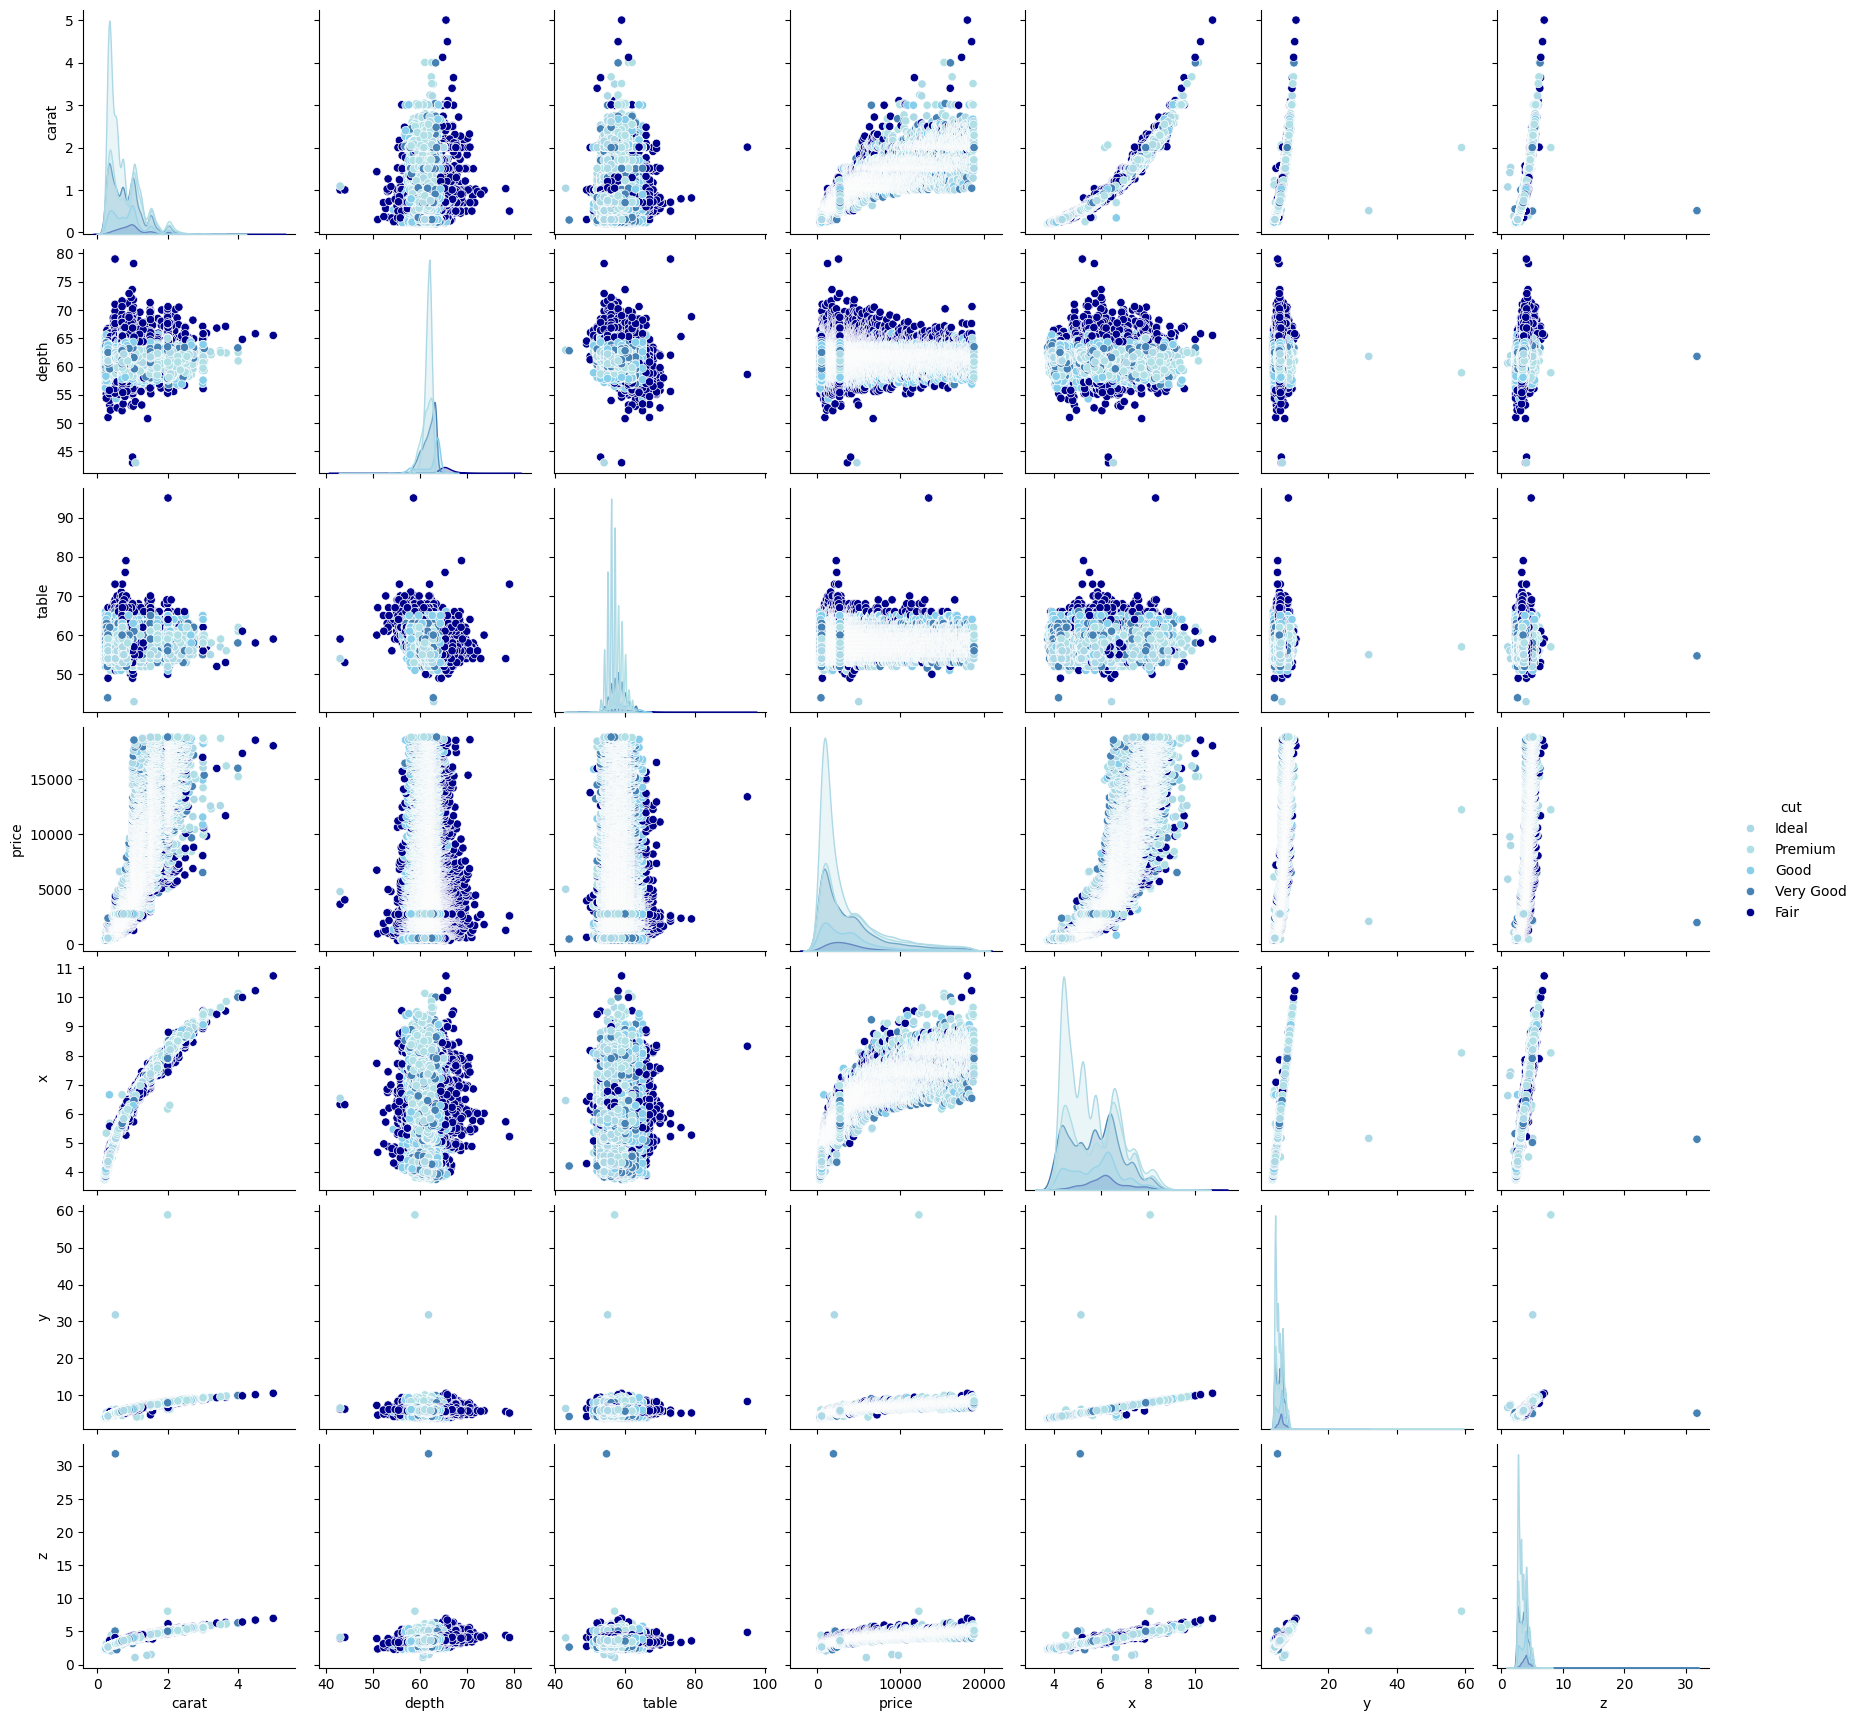

In [71]:
shade = ["#ADD8E6", "#B0E0E6", "#87CEEB", "#4682B4", "#00008B"]
ax = sns.pairplot(df, hue= "cut",palette=shade)

Text(0.5, 1.0, "Regression Line on Price vs 'x'")

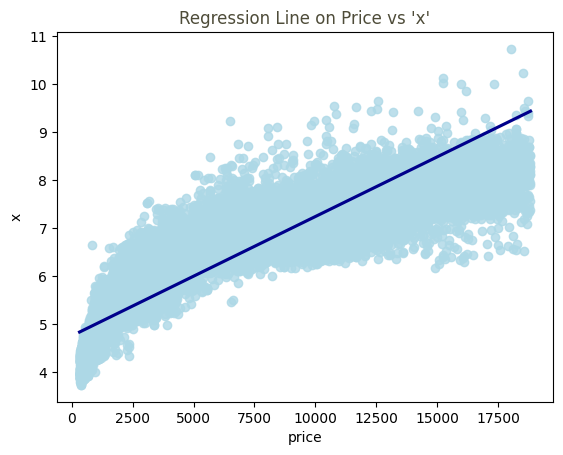

In [72]:
ax = sns.regplot(x="price", y="x", data=df, fit_reg=True, scatter_kws={"color": "#ADD8E6"}, line_kws={"color": "#00008B"})
ax.set_title("Regression Line on Price vs 'x'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

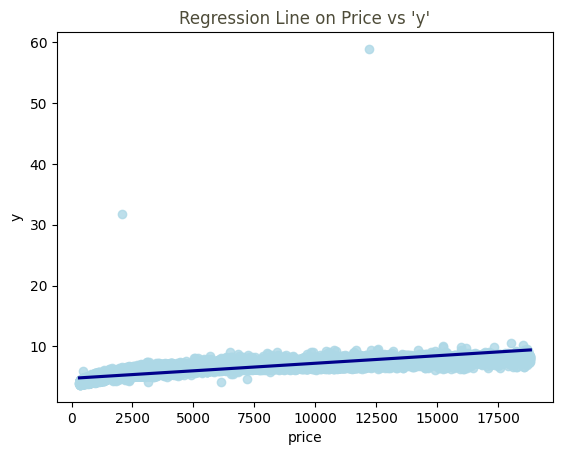

In [73]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#ADD8E6"}, line_kws={"color": "#00008B"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

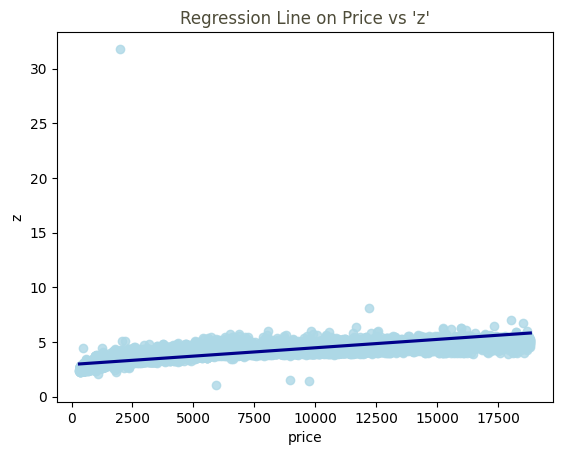

In [74]:
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#ADD8E6"}, line_kws={"color": "#00008B"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

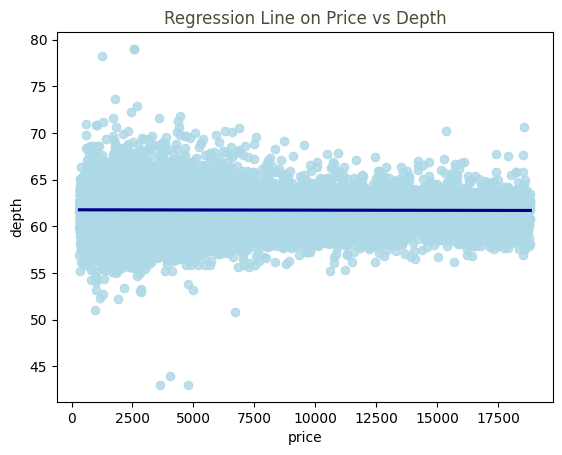

In [75]:
ax= sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#ADD8E6"}, line_kws={"color": "#00008B"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

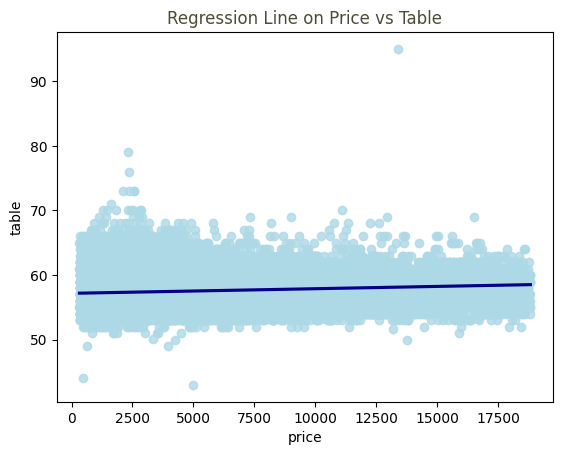

In [76]:
ax=sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#ADD8E6"}, line_kws={"color": "#00008B"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

## Dropping the outliers

In [77]:
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df.shape

(53907, 10)

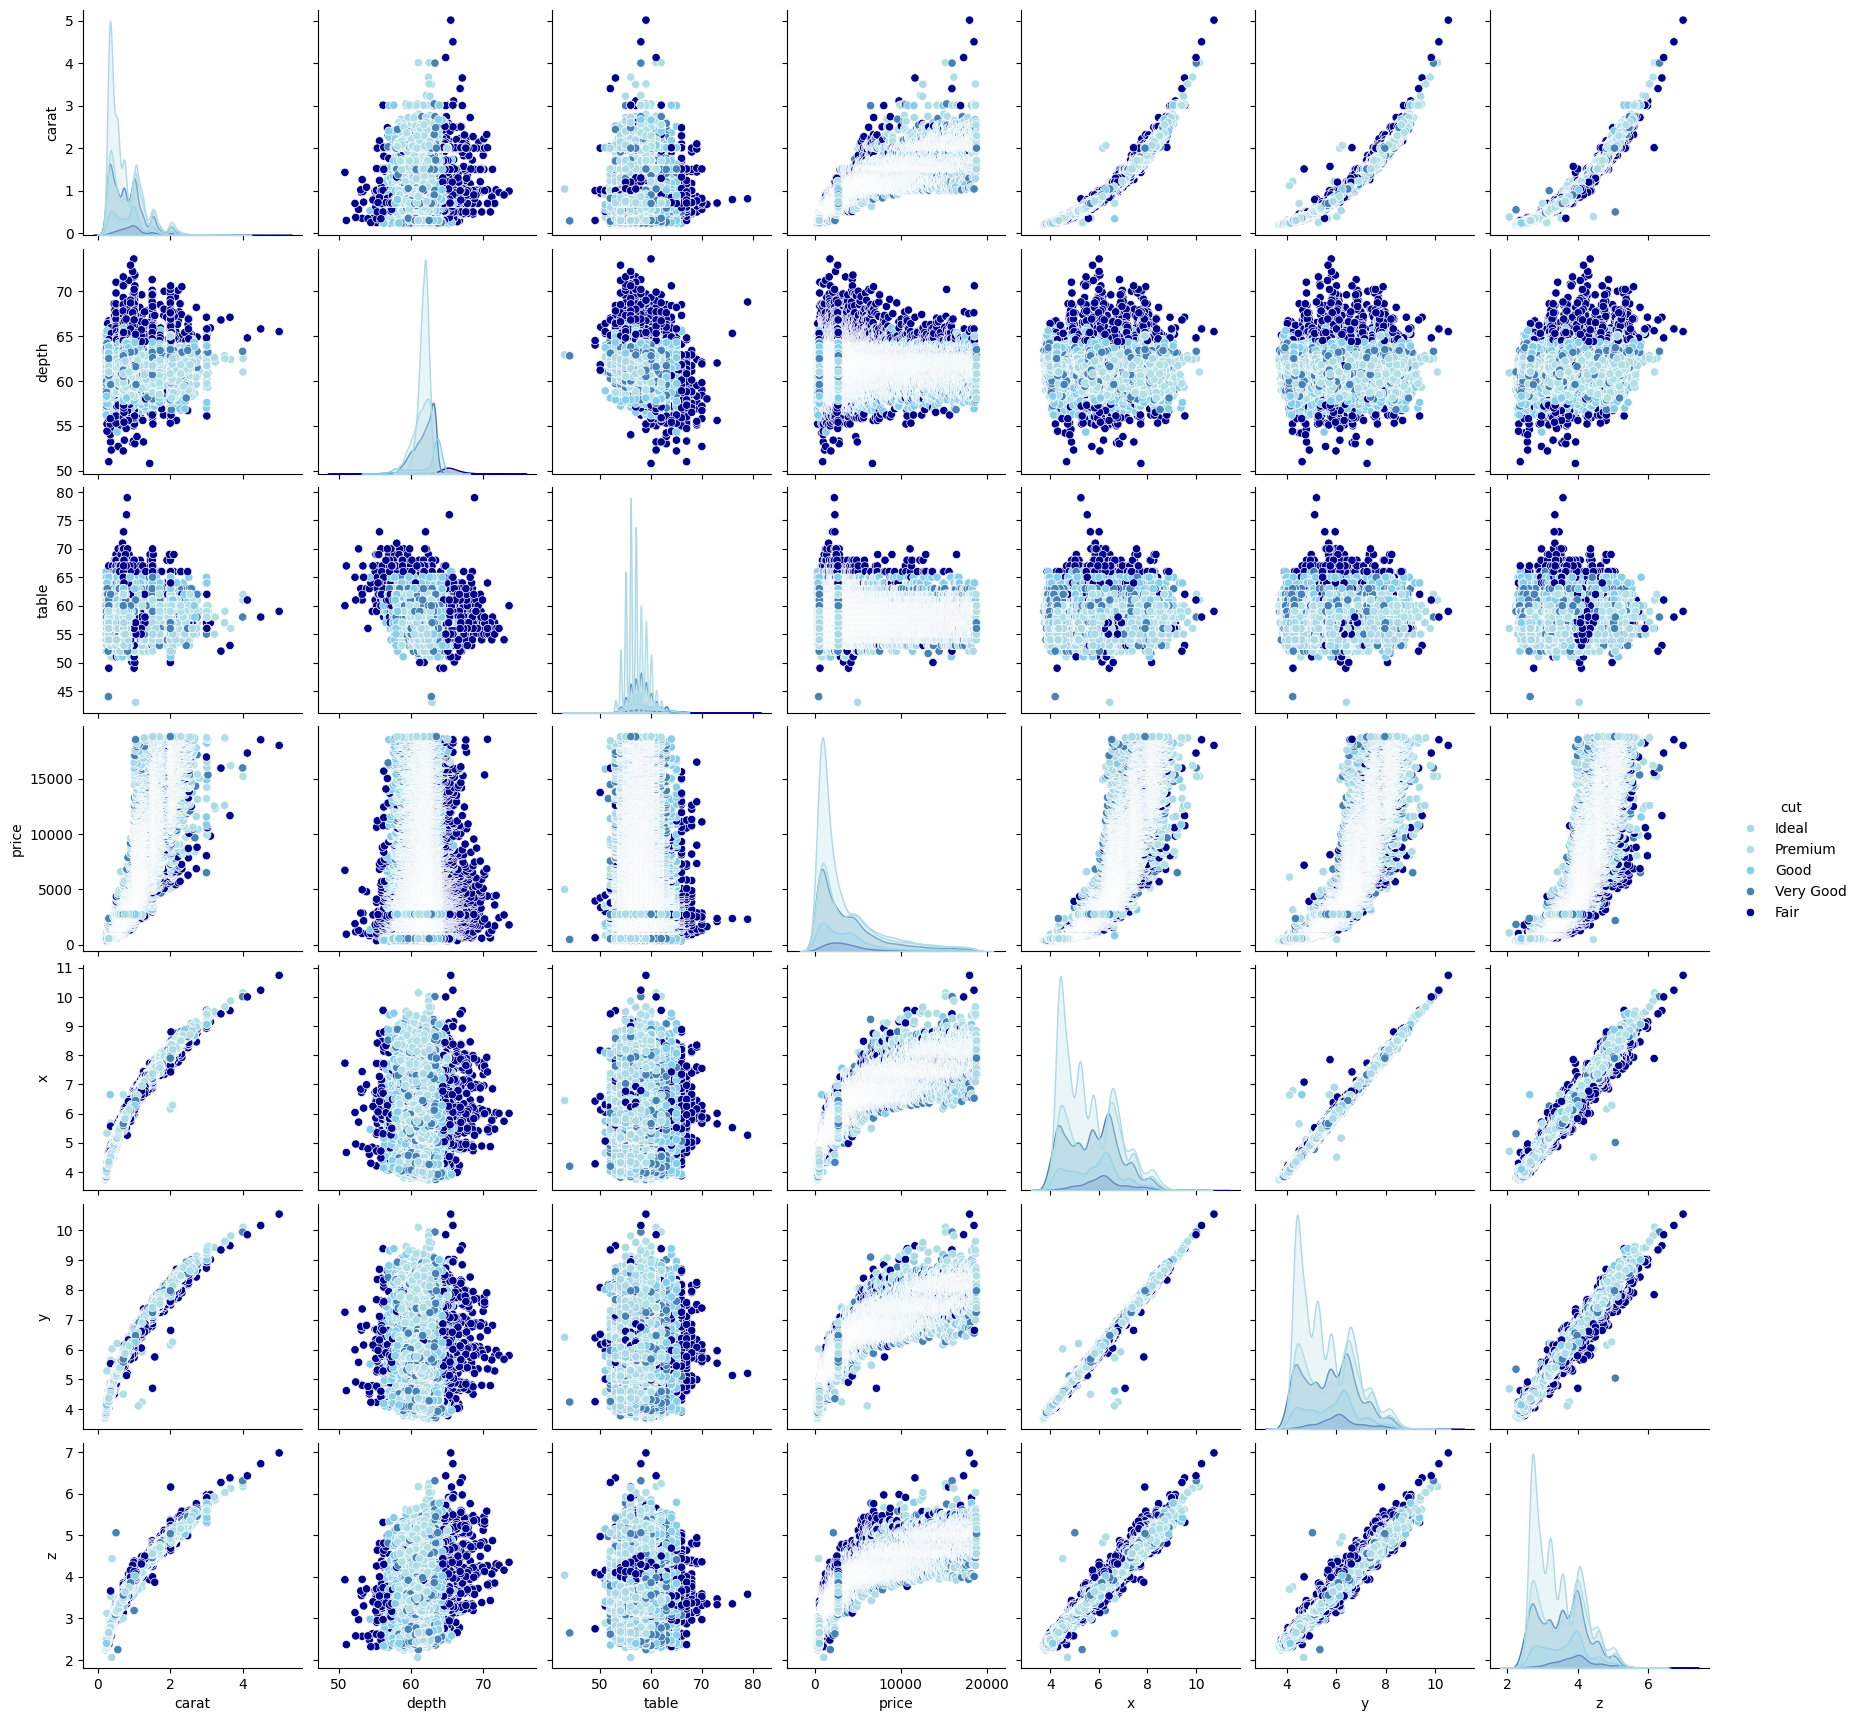

In [78]:
ax=sns.pairplot(df, hue= "cut",palette=shade)

## Encoding of categorical variables

In [79]:
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

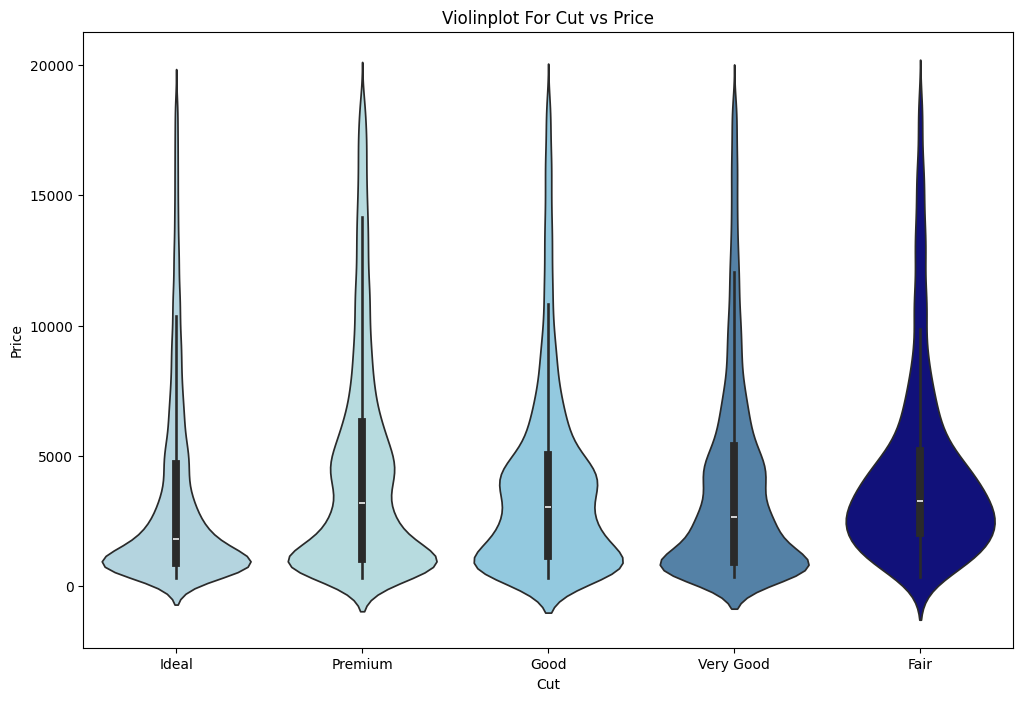

In [80]:
shade = ["#ADD8E6", "#B0E0E6", "#87CEEB", "#4682B4", "#00008B", "#1E90FF", "#6495ED", "#4169E1"]

plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=df, palette=shade[:5], hue="cut",density_norm= "count")
ax.set_title("Violinplot For Cut vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

/tmp/ipykernel_104220/1865298081.py:2: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  ax = sns.violinplot(x="color",y="price", data=df, palette=shade, hue="color" ,density_norm= "count")


Text(0.5, 0, 'Color')

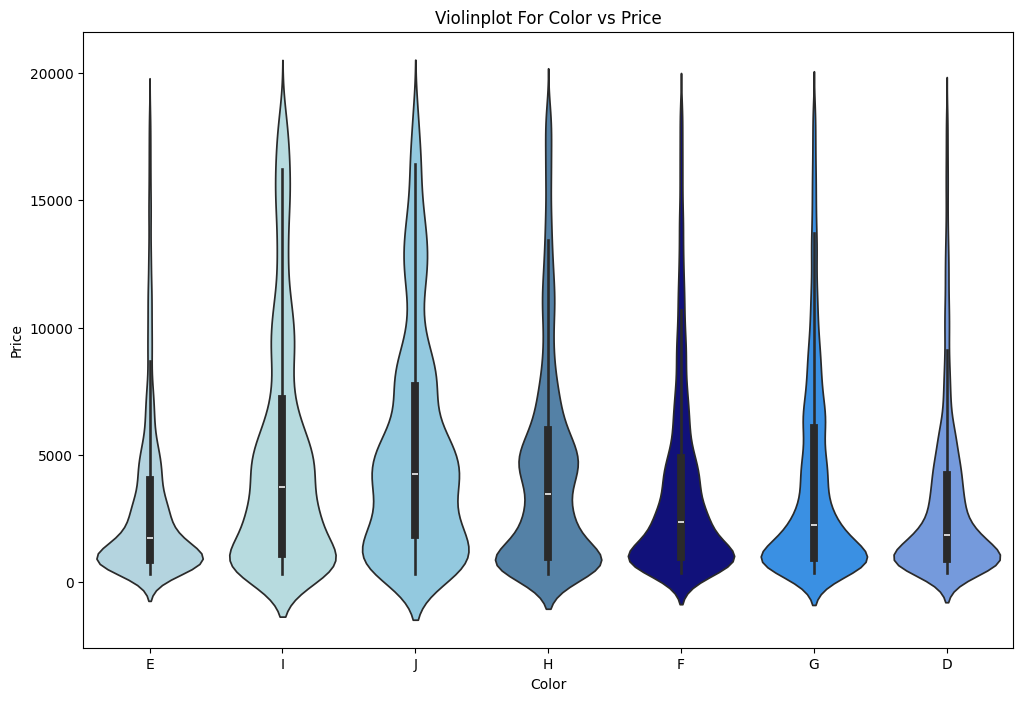

In [81]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=df, palette=shade, hue="color" ,density_norm= "count")
ax.set_title("Violinplot For Color vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Color")

Text(0.5, 0, 'Clarity')

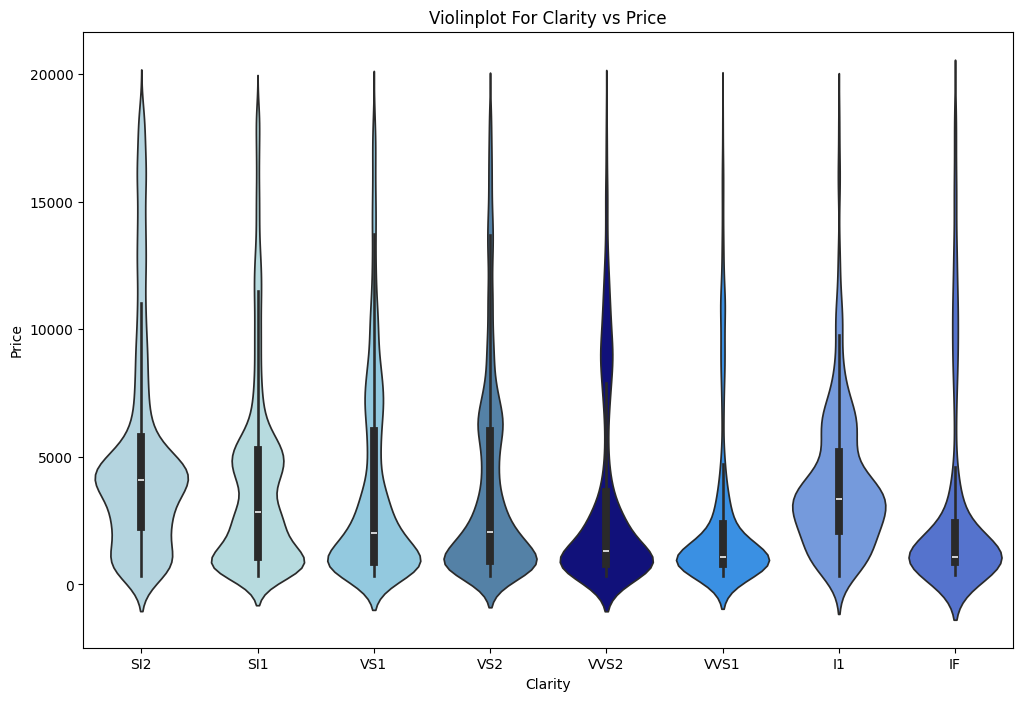

In [82]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade, hue="clarity", density_norm= "count")
ax.set_title("Violinplot For Clarity vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Clarity")

In [83]:
label_df = df.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_df[col] = label_encoder.fit_transform(label_df[col])
    
label_df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [84]:
s = (label_df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables after encoding:")
print(object_cols)

Categorical variables after encoding:
[]


## Correlation matrix

<Axes: >

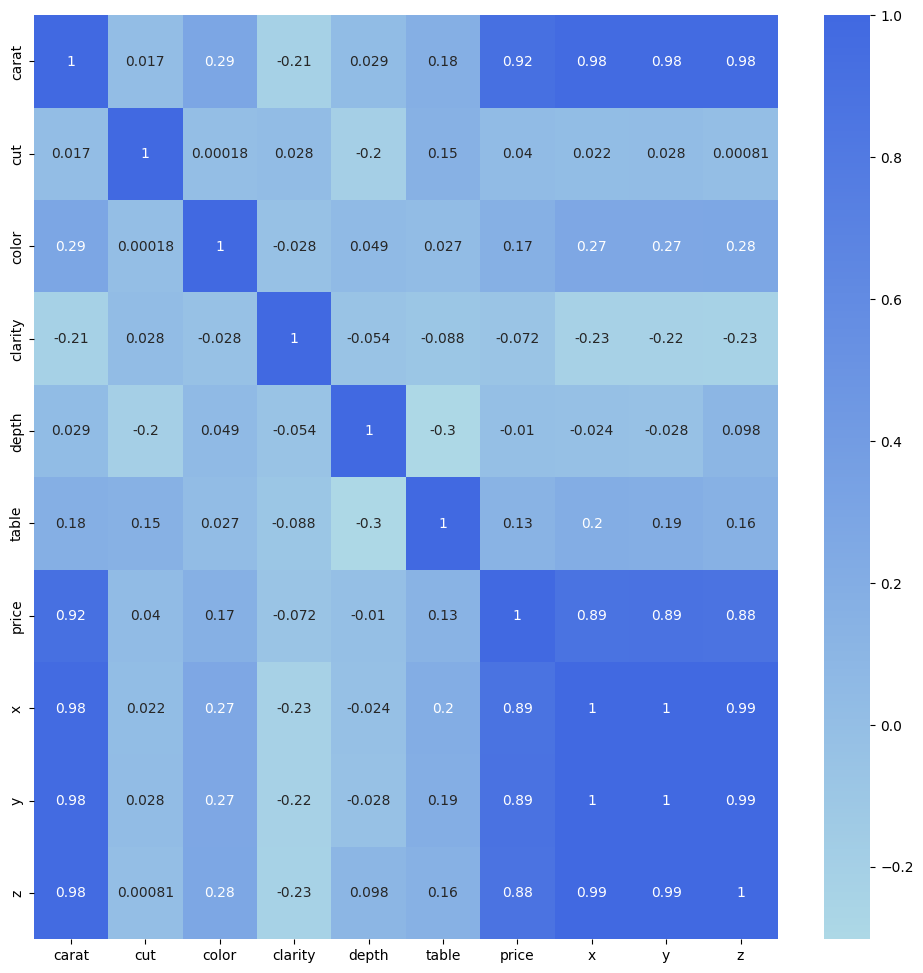

In [85]:
coldest_color = shade[0]
strongest_color = shade[-1]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_blues", [coldest_color, strongest_color])

corrmat = label_df.corr()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, cmap=cmap, annot=True)

# Training the model

In [86]:
X= label_df.drop(["price"],axis =1)
y= label_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [87]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

## Evaluation of each model

In [88]:
metrics_dict = {
    "R^2": [],
    "Adjusted R^2": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

for pipe, model in zip(pipelines, pipe_dict):
    pred = pipe.predict(X_test)
    r2 = metrics.r2_score(y_test, pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    metrics_dict["R^2"].append(r2)
    metrics_dict["Adjusted R^2"].append(adj_r2)
    metrics_dict["MAE"].append(mae)
    metrics_dict["MSE"].append(mse)
    metrics_dict["RMSE"].append(rmse)

metrics_df = pd.DataFrame(metrics_dict, index=pipe_dict.values()).sort_values("R^2", ascending=False)
metrics_df = metrics_df.T

display(metrics_df)

RandomForest   XGBRegressor   DecisionTree     KNeighbors  \
R^2                0.980968       0.980832       0.965716       0.958867   
Adjusted R^2       0.980953       0.980816       0.965687       0.958833   
MAE              268.157440     275.496887     355.031302     399.390020   
MSE           292876.364152  294970.906250  527602.439413  632989.571078   
RMSE             541.180528     543.112241     726.362471     795.606417   

              LinearRegression  
R^2               8.894821e-01  
Adjusted R^2      8.893897e-01  
MAE               8.466042e+02  
MSE               1.700757e+06  
RMSE              1.304131e+03

## Generic algorithm for creating new diamonds

In [ ]:
def generate_mutated_diamonds(df, n_samples=100, mutation_strength=0.1):
    # Categorical and numerical columns
    s = (label_df.dtypes =="object")
    object_cols = list(s[s].index)
    
    categorical_cols = object_cols
    numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns]
    
    # Define categorical order (to mutate "close" categories)
    cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
    categorical_orders = {'cut': cut_order, 'color': color_order, 'clarity': clarity_order}

    # Storage for synthetic data
    mutated_data = []

    for _ in range(n_samples):
        # 1. Pick a random base diamond
        base = df.sample(1).iloc[0].copy()

        # 2. Mutate numerical features
        for col in numerical_cols:
            std = df[col].std() * mutation_strength  # Adjust mutation size
            mutated_value = base[col] + np.random.normal(0, std)
            
            if (df[col] >= 0).all():
                mutated_value = max(0, mutated_value)
            
            base[col] = mutated_value

        # 3. Mutate categorical features
        for col in categorical_cols:
            if random.random() < 0.3:  # 30% chance to mutate
                order = categorical_orders[col]
                current_index = order.index(base[col])
                if random.random() < 0.5 and current_index > 0:
                    base[col] = order[current_index - 1]  
                elif current_index < len(order) - 1:
                    base[col] = order[current_index + 1]  

        mutated_data.append(base)

    mutated_df = pd.DataFrame(mutated_data).reset_index(drop=True)
    
    return mutated_df

In [90]:
mutated_diamonds = generate_mutated_diamonds(df, n_samples=1000, mutation_strength=0.05)
display(mutated_diamonds.head())

carat        cut color clarity      depth      table        price  \
0  0.315387    Premium     E     VS2  60.569485  57.967806   614.420859   
1  0.362580      Ideal     E     VS2  61.150319  56.068355   820.625021   
2  0.337322  Very Good     E     SI2  62.699249  57.148789   856.108035   
3  0.438837      Ideal     F     SI1  61.056983  57.176928   819.095662   
4  0.557141      Ideal     E     VS1  61.312706  53.926080  2864.219752   

          x         y         z  
0  4.425147  4.342542  2.684568  
1  4.520539  4.518009  2.769910  
2  4.346155  4.347854  2.723840  
3  4.841239  5.002029  2.966785  
4  5.528014  5.456290  3.388409

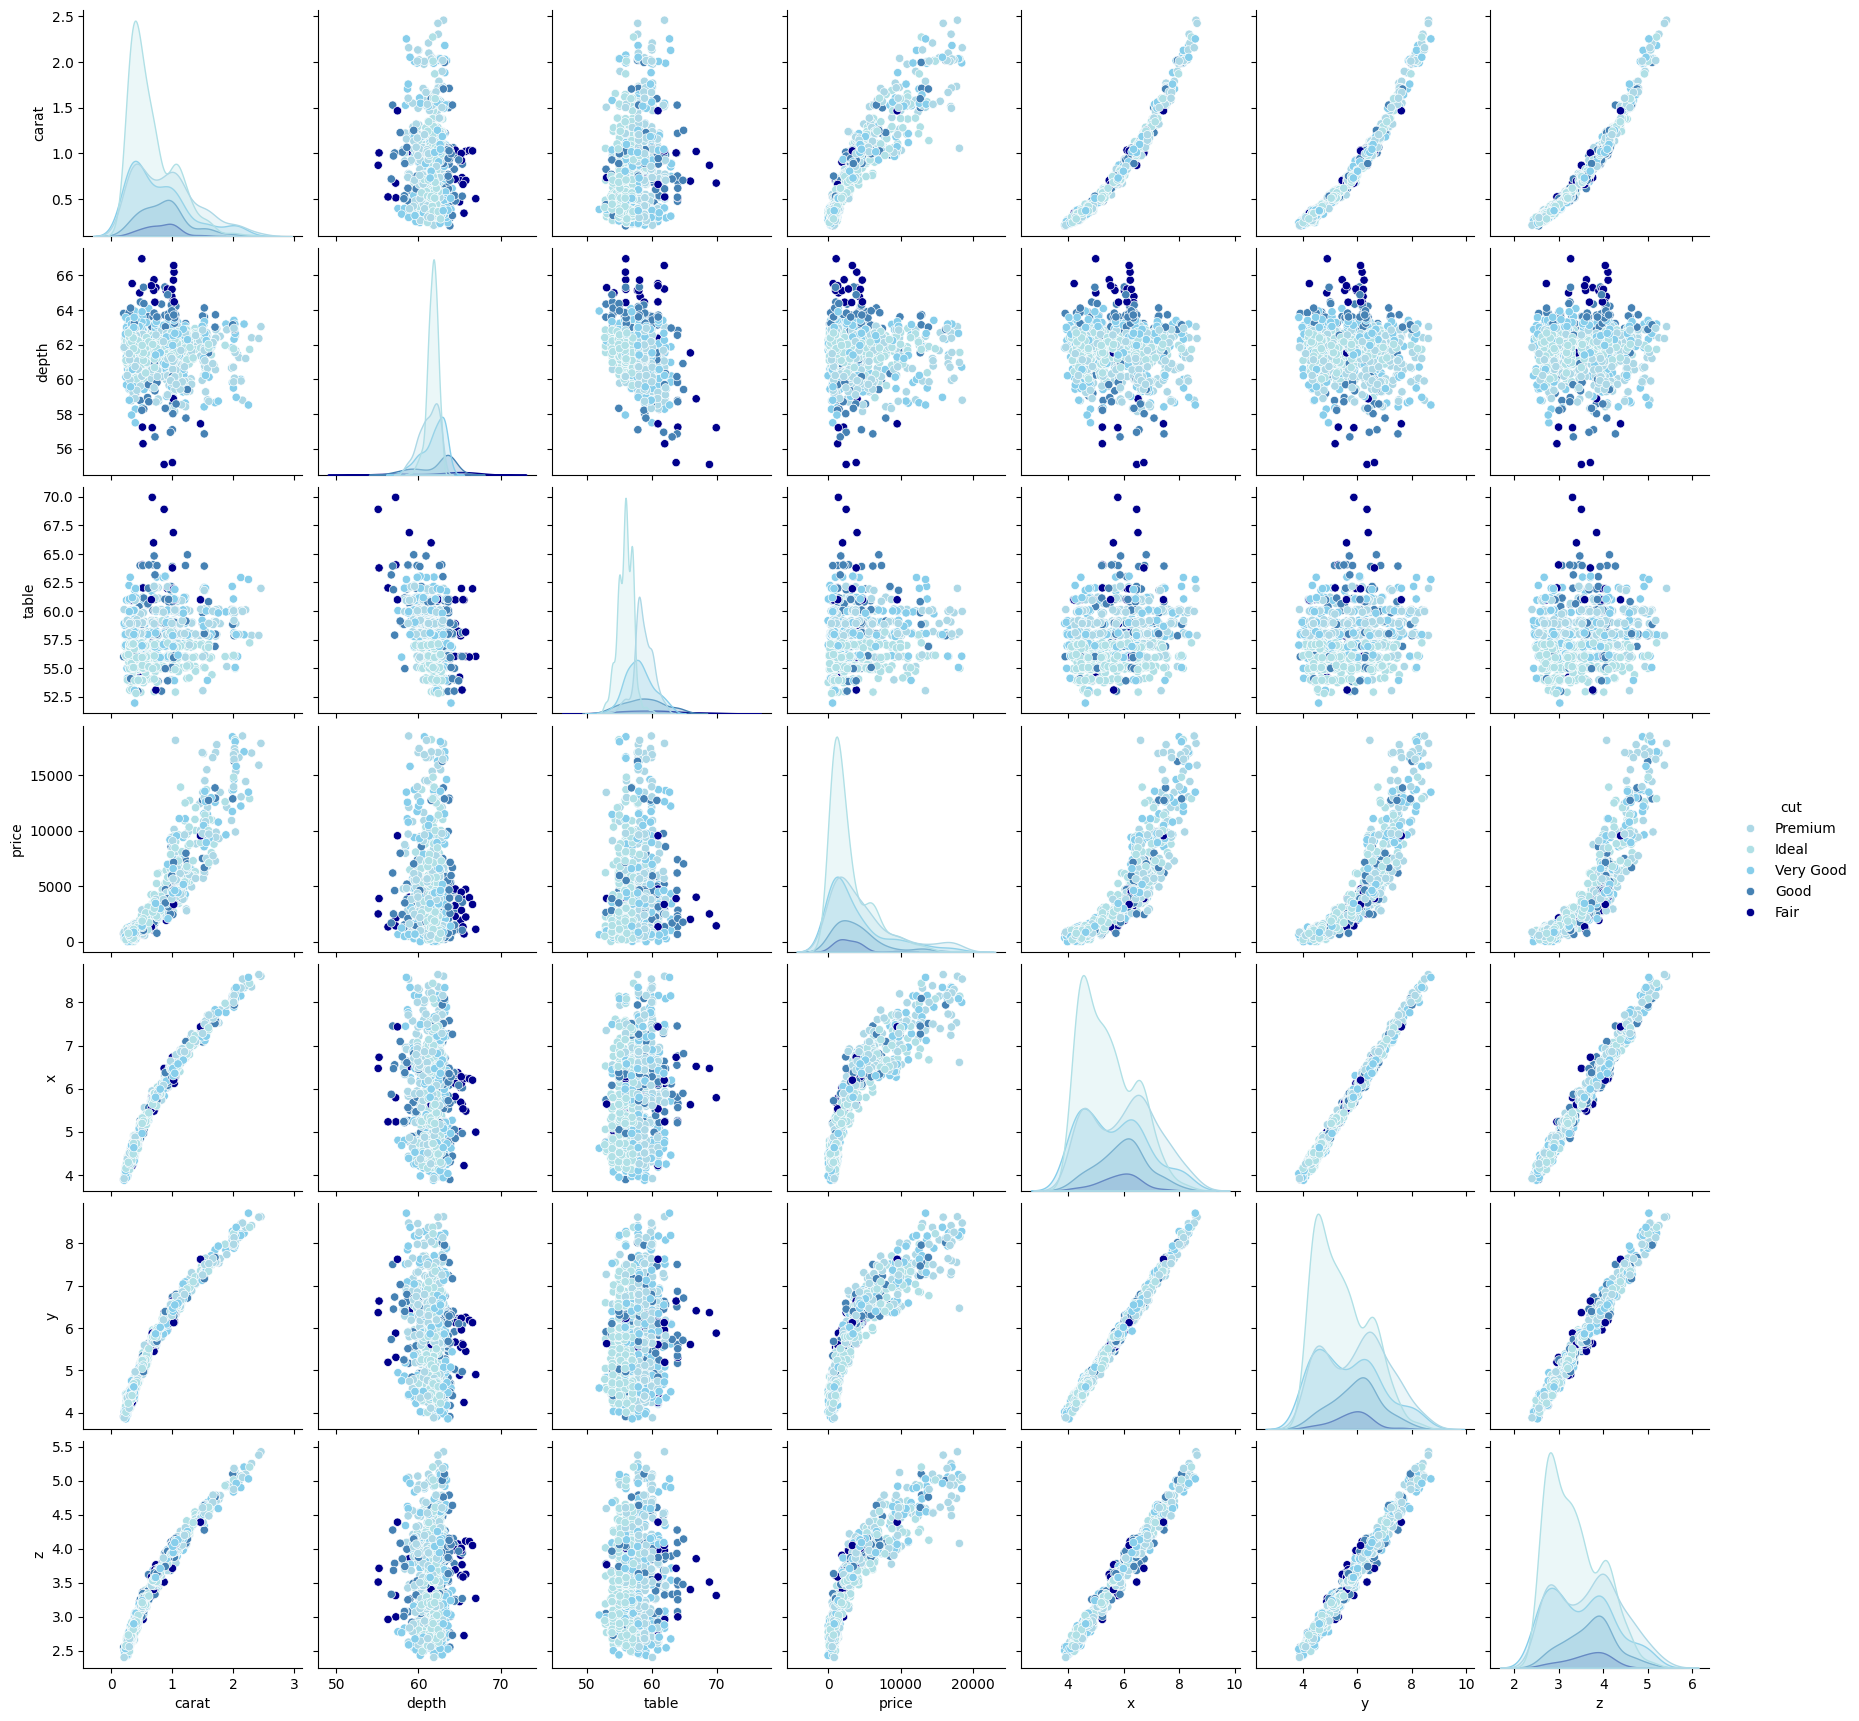

In [91]:
ax=sns.pairplot(mutated_diamonds, hue= "cut",palette=shade[:5])

## Evaluate model for generated diamonds

In [92]:
s = (mutated_diamonds.dtypes =="object")
object_cols = list(s[s].index)


label_mutated_diamonds = mutated_diamonds.copy()
for col in object_cols:
    label_mutated_diamonds[col] = label_encoder.fit_transform(label_mutated_diamonds[col])
label_mutated_diamonds.head()

#X_test and y_test are values from whole label_mutated_diamonds data frame
X_test= label_mutated_diamonds.drop(["price"],axis =1)
y_test= label_mutated_diamonds["price"]

metrics_dict = {
    "R^2": [],
    "Adjusted R^2": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

for pipe, model in zip(pipelines, pipe_dict):
    pred = pipe.predict(X_test)
    r2 = metrics.r2_score(y_test, pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    metrics_dict["R^2"].append(r2)
    metrics_dict["Adjusted R^2"].append(adj_r2)
    metrics_dict["MAE"].append(mae)
    metrics_dict["MSE"].append(mse)
    metrics_dict["RMSE"].append(rmse)

metrics_df = pd.DataFrame(metrics_dict, index=pipe_dict.values()).sort_values("R^2", ascending=False)
metrics_df = metrics_df.T

display(metrics_df)

RandomForest   XGBRegressor     KNeighbors   DecisionTree  \
R^2                0.978578       0.973371       0.961930       0.954089   
Adjusted R^2       0.978383       0.973129       0.961584       0.953672   
MAE              360.592893     400.242450     404.607441     461.067949   
MSE           316906.832647  393938.254545  563187.782673  679174.448835   
RMSE             562.944786     627.645007     750.458382     824.120409   

              LinearRegression  
R^2               8.787416e-01  
Adjusted R^2      8.776392e-01  
MAE               9.110364e+02  
MSE               1.793824e+06  
RMSE              1.339337e+03

## Cross-Validation and Hyperparameter Tuning

In [ ]:
X = label_df.drop('price', axis=1)
y = label_df['price']

model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model with RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))

print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard deviation of RMSE:", np.std(rmse_scores))


Cross-validated RMSE scores: [559.26627941 547.49827749 567.71026631 549.27763296 526.82611287]
Mean RMSE: 550.1157138060387
Standard deviation of RMSE: 13.735064564771715


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [10, 20, None],  # depth of trees
    'min_samples_split': [2, 5],  # min samples to split a node
    'min_samples_leaf': [1, 2],  # min samples per leaf
    'max_features': ['sqrt', 'log2']  # number of features to consider
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)
print("Best hyperparameters:", grid_search.best_params_)
print("Best RMSE (CV):", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10

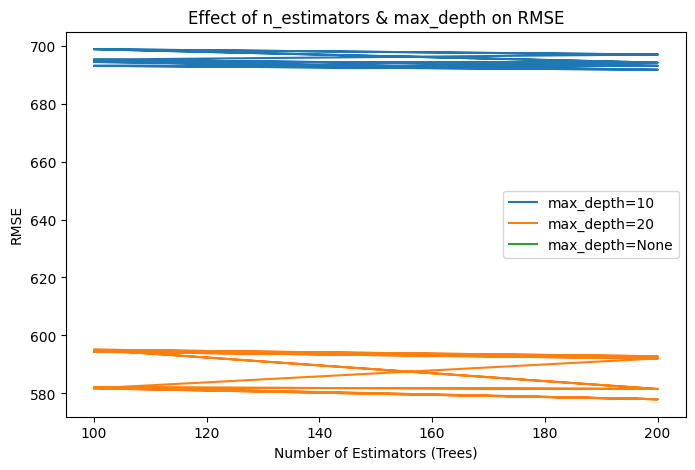

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

# Example plot: RMSE vs. n_estimators
plt.figure(figsize=(8, 5))
for depth in param_grid['max_depth']:
    subset = results[results['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], 
             np.sqrt(-subset['mean_test_score']), 
             label=f"max_depth={depth}")

plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("RMSE")
plt.title("Effect of n_estimators & max_depth on RMSE")
plt.legend()
plt.show()


In [ ]:
# Train final model on full data
best_model = grid_search.best_estimator_

best_model.fit(X, y)

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final model RMSE on full data:", rmse)
print("Final model R^2 on full data:", r2)


Final model RMSE on full data: 569.6743678226462
Final model R^2 on full data: 0.9780625783196125


## Save model to use later

In [101]:

joblib.dump(best_model, 'best_diamond_price_model.pkl')
# loaded_model = joblib.load('best_diamond_price_model.pkl')


['best_diamond_price_model.pkl']